In [127]:
import Orange
import pickle
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
import sklearn.ensemble as skl_ensemble
from Orange.regression import SklTreeRegressionLearner
from Orange.regression import SklLearner
from Orange.regression import SVRLearner
from Orange.regression import RandomForestRegressionLearner
from Orange.regression import TreeLearner
from Orange.regression import NNRegressionLearner
from Orange.regression.base_regression import SklLearnerRegression, SklModelRegression
from Orange.base import TreeModel as TreeModelInterface
from Orange.tree import Node, DiscreteNode, MappedDiscreteNode, NumericNode, TreeModel
from Orange.base import SklLearner
from Orange.regression import SklLearner, SklModel, Learner
from Orange.ensembles import ada_boost
from Orange.ensembles.ada_boost import SklAdaBoostRegressionLearner
import matplotlib.pyplot as plt

In [128]:
#Load the data
data = Orange.data.Table.from_file("Dynamic compaction analysis_new.tab")

# Split the data into features (X) and target variable (y)
X = data.X
y = data.Y

print(y)

[2.997243   3.137973   3.736729   3.656153   3.170659   2.48751153
 2.92181821 2.93909041 3.12304829 2.9932683  2.95463446 2.90897342
 2.32       2.06       2.34       2.34       2.16       1.65
 3.20516661 2.76603075 3.09351736 3.2025586  3.01485578 3.8327696
 3.38576513 3.04651285 3.09991668 3.09263968 3.16888    3.07336112
 2.09       2.08       1.75       2.04       2.         2.
 3.77295    3.87595    4.21564    3.60732    3.67347193 4.33738
 3.65187578 3.27449377 2.9737744  2.84556703 3.24926718 2.83207235
 2.39       2.48       2.31       2.47       2.38       2.22
 0.58663457 0.62191565 0.84535345 1.08605822 1.08983518 0.46081253
 0.54159205 0.68391899 0.91846726 1.14662791 0.45559345 0.58149427
 0.65657969 0.86763572 0.45225715 0.59048467 0.76596175 0.92071594
 0.35282036 0.54468955 0.80466973 0.88616878 0.99350216 0.53933431
 0.63739662 0.77409761 0.99444717 1.0079455  0.58680992 0.88549234
 1.10635725 1.26449783 1.35951616 1.91667958 0.66279739 0.87641895
 1.2481403  1.43187

In [129]:
def jitter1(X, scale=0.1):
    return X + np.random.normal(0, scale, X.shape)

def jitter1_test(regressor1, X, y, scales = np.linspace(0, 0.5, 30), N = 5):
    out = []
    for s in scales:
        avg = 0.0
        for r in range(N):
            y_pred = regressor1.predict(jitter1(X, s))
            avg += r2_score(y, y_pred)
        out.append(avg / N)
    return out, scales

In [130]:
regressor1 = RandomForestRegressionLearner(criterion='mse', max_depth=3, max_features='auto',
                      min_samples_split=5, n_estimators=10, n_jobs=1).fit(X,y)

regressor1_scores, jitters1 = jitter1_test(regressor1, X, y)

C:\Users\Jelena\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Jelena\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [131]:
def jitter2(X, scale=0.1):
    return X + np.random.normal(0, scale, X.shape)

def jitter2_test(regressor2, X, y, scales = np.linspace(0, 0.5, 30), N = 5):
    out = []
    for s in scales:
        avg = 0.0
        for r in range(N):
            y_pred = regressor2.predict(jitter2(X, s))
            avg += r2_score(y, y_pred)
        out.append(avg / N)
    return out, scales

In [132]:
regressor2 = Lasso(alpha=0.0001).fit(X,y)

regressor2_scores, jitters2 = jitter2_test(regressor2, X, y)

In [133]:
def jitter3(X, scale=0.1):
    return X + np.random.normal(0, scale, X.shape)

def jitter3_test(regressor3, X, y, scales = np.linspace(0, 0.5, 30), N = 5):
    out = []
    for s in scales:
        avg = 0.0
        for r in range(N):
            y_pred = regressor3.predict(jitter3(X, s))
            avg += r2_score(y, y_pred)
        out.append(avg / N)
    return out, scales

In [134]:
regressor3 =  SklTreeRegressionLearner().fit(X,y)

regressor3_scores, jitters3 = jitter3_test(regressor3, X, y)

In [135]:
def jitter4(X, scale=0.1):
    return X + np.random.normal(0, scale, X.shape)

def jitter4_test(regressor4, X, y, scales = np.linspace(0, 0.5, 30), N = 5):
    out = []
    for s in scales:
        avg = 0.0
        for r in range(N):
            y_pred = regressor4.predict(jitter4(X, s))
            avg += r2_score(y, y_pred)
        out.append(avg / N)
    return out, scales

In [136]:
regressor4 = SVRLearner(coef0=1.0, gamma='auto', max_iter=100).fit(X,y)

regressor4_scores, jitters4 = jitter4_test(regressor4, X, y)

C:\Users\Jelena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [137]:
def jitter5(X, scale=0.1):
    return X + np.random.normal(0, scale, X.shape)

def jitter5_test(regressor5, X, y, scales = np.linspace(0, 0.5, 30), N = 5):
    out = []
    for s in scales:
        avg = 0.0
        for r in range(N):
            y_pred = regressor5.predict(jitter5(X, s))
            avg += r2_score(y, y_pred)
        out.append(avg / N)
    return out, scales

In [139]:
regressor5 = SklAdaBoostRegressionLearner().fit(X,y)

regressor5_scores, jitters5 = jitter5_test(regressor5, X, y)

In [140]:
def jitter6(X, scale=0.1):
    return X + np.random.normal(0, scale, X.shape)

def jitter6_test(regressor6, X, y, scales = np.linspace(0, 0.5, 30), N = 5):
    out = []
    for s in scales:
        avg = 0.0
        for r in range(N):
            y_pred = regressor6.predict(jitter6(X, s))
            avg += r2_score(y, y_pred)
        out.append(avg / N)
    return out, scales

In [143]:
regressor6 = NNRegressionLearner().fit(X,y)

regressor6_scores, jitters6 = jitter6_test(regressor6, X, y)

C:\Users\Jelena\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


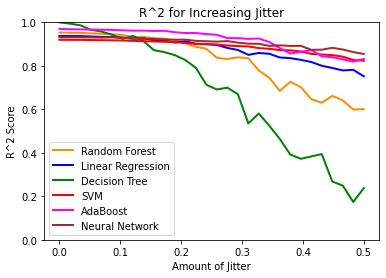

In [148]:
plt.figure()
lw = 2
plt.plot(jitters1, regressor1_scores, color='darkorange',
         lw=lw, label='Random Forest')
plt.plot(jitters2, regressor2_scores, color='blue',
         lw=lw, label='Linear Regression')
plt.plot(jitters3, regressor3_scores, color='green',
         lw=lw, label='Decision Tree')
plt.plot(jitters4, regressor4_scores, color='red',
         lw=lw, label='SVM')
plt.plot(jitters5, regressor5_scores, color='magenta',
         lw=lw, label='AdaBoost')
plt.plot(jitters6, regressor6_scores, color='brown',
         lw=lw, label='Neural Network')
plt.xlabel('Amount of Jitter')
plt.ylabel('R^2 Score')
plt.title('R^2 for Increasing Jitter')
plt.legend(loc="lower left")
plt.ylim(0, 1)
plt.show()

In [147]:
plt.savefig("jitter figure.pdf")

<Figure size 432x288 with 0 Axes>